In [61]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import scipy.special
sns.set(style="ticks")
import statsmodels.api as sm

%matplotlib inline
plt.rc('text',usetex=True)
plt.rc('lines',linewidth=1)
plt.rc('legend',fontsize=10)
plt.rc('mathtext',fontset='cm')
plt.rc('font',**{'family':'serif','serif':['Times New Roman'],'size':10})



In [62]:
def V(x):
  return x**2


In [66]:
def rundmc(n=500,nstep=500,tau=0.01):
  """Generate a set of n configurations destributed according to psit**2"""  
  stau=np.sqrt(2.0*tau) #0.5 is the mass of the particle
  x=3*(np.random.rand(n)-0.5) #initialize our wave function
  weight=np.ones(n)

  xlog=[]
  weightlog=[]
  for i in range(0,nstep):
    #These are diffusion plus branching (weighting) steps
    x=x+stau*np.random.randn(n)
    weight=weight*np.exp(-tau*V(x))
    
    #record in the log
    xlog.append(x)
    weightlog.append(weight)
    
  return xlog,weightlog



/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


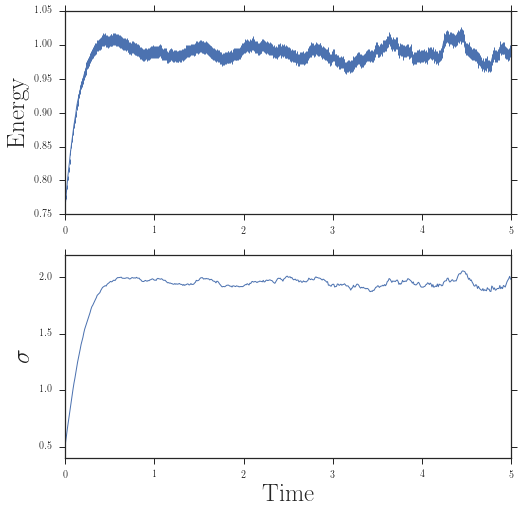

In [67]:
npts=50000
tau=0.01
xlog,weightlog=rundmc(n=npts,tau=tau) 
tsteps=[]
enavg=[]
enstd=[]
for i,(x,w) in enumerate(zip(xlog,weightlog)):
  tsteps.append(i*tau)
  en=V(x)
  enavg.append(np.average(en,weights=w))
  enstd.append(np.average((en-enavg[-1])**2,weights=w))

fig,axes=plt.subplots(2,1,figsize=(8,8))
axes[0].errorbar(tsteps,enavg,enstd/np.sqrt(npts))
axes[1].plot(tsteps,enstd)
axes[1].set_xlabel(r"Time",fontsize=25)
axes[0].set_ylabel("Energy",fontsize=25)
axes[1].set_ylabel(r"$\sigma$",fontsize=25)
               